In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from numba import jit, autojit, vectorize, guvectorize, float64, int64

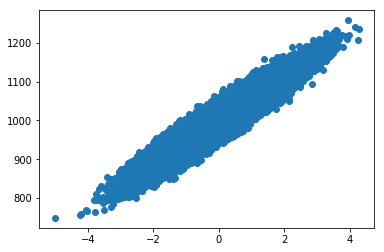

In [90]:
X, y = make_regression(100000, 1, noise=18.3, bias=1000, random_state=15)
plt.scatter(X,y);

In [156]:
@jit(float64[:,:](float64[:,:], float64[:,:], float64[:,:], int64, float64), nopython=True, cache=True)
def solve(X, y, w, nepochs, lr):
    m,n = X.shape
    for i in range(nepochs):
        grad = (1/m * np.dot(X.T, (np.dot(X,w) - y)))
        w = w - lr * grad
    return w

In [158]:
Xbias = np.insert(X,0,1,axis=1)
w = np.zeros((2,1))
yrs = y.reshape((-1,1))

%time solve(Xbias, yrs, w, 1000, 0.1)

CPU times: user 4.33 s, sys: 509 ms, total: 4.84 s
Wall time: 2.76 s


array([[1000.00219658],
       [  55.9763183 ]])

In [150]:
solve.inspect_types()

solve (array(float64, 2d, A), array(float64, 2d, A), array(float64, 2d, A), int64, float64)
--------------------------------------------------------------------------------
# File: <ipython-input-146-b5f3c22c62c3>
# --- LINE 1 --- 
# label 0

@jit(float64[:,:](float64[:,:], float64[:,:], float64[:,:], int64, float64), nopython=True)

# --- LINE 2 --- 

def solve(X, y, w, nepochs, lr):

    # --- LINE 3 --- 
    #   X = arg(0, name=X)  :: array(float64, 2d, A)
    #   y = arg(1, name=y)  :: array(float64, 2d, A)
    #   w = arg(2, name=w)  :: array(float64, 2d, A)
    #   nepochs = arg(3, name=nepochs)  :: int64
    #   lr = arg(4, name=lr)  :: float64
    #   $0.2 = getattr(value=X, attr=shape)  :: tuple(int64 x 2)
    #   $0.5 = exhaust_iter(value=$0.2, count=2)  :: tuple(int64 x 2)
    #   del $0.2
    #   $0.3 = static_getitem(value=$0.5, index=0, index_var=None)  :: int64
    #   $0.4 = static_getitem(value=$0.5, index=1, index_var=None)  :: int64
    #   del $0.5
    #   m = $0.3 

In [96]:
def solve2(X, y, w, nepochs, lr):
    m,n = X.shape
    for i in np.arange(nepochs):
        w = w - lr * (1/(2*m)) * np.dot(X.T, (np.dot(X,w) - y))
    return w

In [134]:
Xbias = np.insert(X,0,1,axis=1)
w = np.zeros((2,1))

%time solve2(Xbias, y.reshape((-1,1)), w, 1000, 0.1)

CPU times: user 2.25 s, sys: 28.3 ms, total: 2.28 s
Wall time: 1.2 s


array([[1000.00219658],
       [  55.9763183 ]])